# User Generated Content Analytics - Assignment No.2

## PART A. Collecting tweets on the 2018 Texas Senate race

Using a Twitter developer's account data were scraped from Twitter's API using the following key words:
1. texas 
2. TexasSenateSeat 
3. texsen 
4. texassenatedebate 
5. teambeto 
6. teamcruz 
7. gobeto 
8. gocruz 
9. bluewave 
10. betofortexas 
11. cruzfortexas
12. texasdebate

The data were scrapped in intervals of at least 12h in order to ensure a substantial amount of data is collected, while the keywords were selected through trial and error, ensuring that those are the most suitable ones related to the Texas senate race. 

The below code was used for the collection of the data.

In [1]:
# Libraries needed for the scrapper code

import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import time

In [2]:
# token and keys to be replaced accordingly
access_token = "ACCESS_TOKEN"
access_token_secret = "ACCESS_TOKEN_SECRET"
consumer_key = "CONSUMER_KEY"
consumer_secret = "CONSUMER_SECRET"

In [ ]:
# Hitting and defining the API with keys and token

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Over here we are writing the code which fetches the tweets received from API 
# and converting it into a readable format (dataframe) and saving in csv
# The whole code is encapsulated into a while loop which sleeps for 12 hours after performing 1 iteration - 
# to automate tweet collection process

while True:
    fetched_tweets = api.search(q=['texas OR TexasSenateSeat OR texsen OR texassenatedebate OR teambeto OR teamcruz OR gobeto OR gocruz OR bluewave OR betofortexas OR cruzfortexas'],tweet_mode = 'extended', lang='en', count=3000)
    print ("Number of tweets:" ,len(fetched_tweets))
    def populate_tweet_df(tweets):
        #Create an empty dataframe
        df = pd.DataFrame()
        df['id'] = list(map(lambda tweet: tweet.id, tweets))
        df['full_text'] = list(map(lambda tweet: tweet.full_text, tweets))
        df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
        df['location'] = list(map(lambda tweet: tweet.user.location, tweets))
        df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
        df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
        df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
        df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
        return df
    df_tweet = populate_tweet_df(fetched_tweets)
    df_tweet.to_csv("Tweets_6.csv", mode='a', header=False, index = False)
    time.sleep(43200)

## PART B. Finding four key issues mentioned by the public in the tweets

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
ps = PorterStemmer()

First we import the collected data and perform an initial inspection and evaluation.

In [4]:
# importing data from the csv file
twitter_data = pd.read_csv('Tweets_6.csv')

In [5]:
twitter_data

,id,full_text,retweeted,location,screen_name,verified_user,followers_count,friends_count
0,1.051700e+18,RT @jennycohn1: If you want @BetoORourke to de...,False,"Portland, OR",psychwriter1515,False,2163,3024
1,1.051700e+18,Four people are dead after shooting at a 1-yea...,False,Instagram - PinkLipPash,PinkLipPash,False,2058,1912
2,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,"London, England",_neus_n,False,238,1115
3,1.051700e+18,RT @atDavidHoffman: What the hell is wrong wit...,False,"California, USA",KatNCreem65,False,2068,5000
4,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,"Pittsburgh, PA",cjregan99,False,978,4445
5,1.051700e+18,U.S. Plans To Expand Tent Camp In Texas For Un...,False,Planet Mars,Fucktruuump,False,730,1380
6,1.051700e+18,RT @tedcruz: Over 2000 Texans came out for our...,False,"Maryland, USA",ColtonAaron3,False,243,444
7,1.051700e+18,RT @dawg_lb: Re-elect Senator Ted Cruz 2018 U....,False,Tweeter Land,bgood12345,False,68171,17847
8,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,NaN,jm_5479,False,45,1230
9,1.051700e+18,"RT @StephenKing: Hey, Texas! Polls say Cruz is...",False,NaN,Calli_Jones,False,234,283


In [6]:
len(twitter_data.iloc[:]['full_text'])

5899

In [7]:
twitter_data.iloc[:]['full_text'].describe()

count                                                  5899
unique                                                 3371
top       RT @realDonaldTrump: Beto O’Rourke is a total ...
freq                                                     85
Name: full_text, dtype: object

As a first comment, it was noted that many tweets are not logically complete sentences, as due to the character limitations, users end sentences midway (many tweets were ending in "..." and completing the thought in a separate entry), which is a specific characteristic of the medium.

Next, in order to avoid miscalculations in our analysis, we remove the duplicated tweets and we identify the same by crosschecking for each tweet the full text in combination with the screen name, filtering out as necessary.

In [8]:
unique_tweets = []

for i in range(len(twitter_data.iloc[:]['full_text'])):
    a = (twitter_data.loc[:,'screen_name'][i], twitter_data.loc[:,'full_text'][i])
    if a not in unique_tweets:
         unique_tweets.append(a)
            
print('A total number of '+str(len(unique_tweets))+' were collected for analysis.')

A total number of 5796 were collected for analysis.


Based on the above, it is important to note that even though there were 3371 unique texts in a total of 5899, there are only 103 duplicates. It appears that a lot of users retweet instead of expressing their thoughts directly.

Next, in order to identify the four key issues, we used word frequency among the tweets. To do that, we collect all the tweets into a single string and count the occurence of each word. IN addition we will tokenize the words and also remove stop words that are of no interest to us.

In [9]:
# combining all the tweets into a single string
tweets = []
for i in range(len(unique_tweets)):
    # making all text into lower case and appending to a single list
    tweets.append(unique_tweets[i][1].lower())

In [10]:
all_tweets = ''.join(tweets)

In [11]:
# counting the occurencies of words and tokenzing them
tokens = word_tokenize(all_tweets)

# stemming the words
# stem_tokens = [ps.stem(w) for w in tokens]
stem_tokens = tokens

# adding pos tag to the words and counting occurencies
tokens_pos = pos_tag(stem_tokens) 
wordcount = Counter(tokens_pos)

In [12]:
# sorting the words based on their frequency
word_list = sorted(list(wordcount.items()), key = lambda w: -w[1])

# keeping only words with length greater than 2
word_list = [word_list[i] for i in range(len(word_list)) if len(word_list[i][0][0]) > 2]

word_list[:10]

[(('the', 'DT'), 3359),
 (('texas', 'NN'), 2500),
 (('and', 'CC'), 1967),
 (('https', 'NN'), 1871),
 (('for', 'IN'), 1428),
 (('this', 'DT'), 909),
 (('you', 'PRP'), 887),
 (('cruz', 'NN'), 884),
 (('beto', 'NN'), 829),
 (('texas', 'JJ'), 664)]

In [13]:
# introducing stop words and creating a list of them
import nltk
nltk.download('stopwords')

stoplist = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# filetering out stop words 
no_stopword_list = []

for i in range(len(word_list)):
    if word_list[i][0][0] not in stoplist and len(word_list[i][0][0]) > 2 and word_list[i][0][1] != 'CD':
        no_stopword_list.append(word_list[i])

# filtering out by pos tags
pos_tags = ['NN', 'NNP', 'JJ']
no_stopword_list = [no_stopword_list[i] for i in range(len(no_stopword_list)) if no_stopword_list[i][0][1] in pos_tags]

In [15]:
no_stopword_list

[(('texas', 'NN'), 2500),
 (('https', 'NN'), 1871),
 (('cruz', 'NN'), 884),
 (('beto', 'NN'), 829),
 (('texas', 'JJ'), 664),
 (('betoorourke', 'NN'), 529),
 (('trump', 'NN'), 437),
 (('realdonaldtrump', 'NN'), 379),
 (('rourke', 'NN'), 365),
 (('houston', 'NN'), 350),
 (('amp', 'NN'), 326),
 (('vote', 'NN'), 293),
 (('state', 'NN'), 259),
 (('tedcruz', 'NN'), 249),
 (('rally', 'NN'), 236),
 (('new', 'JJ'), 191),
 (('senator', 'NN'), 178),
 (('party', 'NN'), 166),
 (("o'rourke", 'NN'), 159),
 (('great', 'JJ'), 157),
 (('voting', 'NN'), 155),
 (('early', 'JJ'), 153),
 (('president', 'NN'), 148),
 (('senate', 'NN'), 136),
 (('chronicle', 'NN'), 136),
 (('hey', 'NN'), 126),
 (('last', 'JJ'), 124),
 (('virginia', 'NN'), 122),
 (('day', 'NN'), 121),
 (('time', 'NN'), 121),
 (('democratic', 'JJ'), 120),
 (('voter', 'NN'), 118),
 (('ted', 'JJ'), 114),
 (('family', 'NN'), 114),
 (('krassenstein', 'NN'), 112),
 (('sign', 'NN'), 109),
 (('today', 'NN'), 102),
 (('big', 'JJ'), 100),
 (('election',

Based on the above, we decided to analyse our data and group words together that refer to the same issue, in order to optimize the use of our collected data. In those terms, the following were identified as the most important issues related to the 2018 Texas Senate Race:

1. Trump
2. Health
3. Justice
4. Immigration

And the relevant replacements that were considered for our data are presented below.

In [16]:
trump = ['donald', 'realdonaldtrump', '@donald', '@realdonaldtrump','@donald:', '@realdonaldtrump:']
health = ['health', 'healthcare', 'medicare', 'medicaid', 'obamacare']
justice = ['legal', 'fraud', 'investigation', 'justice', 'illegal', 'law', 'prison', 'attorney','justicesuit']
immigration = ['non-citizens', 'border', 'caravan', 'wall']

Implementing the same word frequency analysis after the replacements, we have the below results:

In [17]:
word_tweets = []

for t in tweets:
    #if len(set(t.split(' ')).intersection(replace_check)) > 0: 
    for word in trump:
        if word in t:
            t = t.replace(word, 'trump')
    for word in health:
        if word in t:
            t = t.replace(word, 'health')
    for word in justice:
        if word in t:
            t = t.replace(word, 'justice')
    for word in immigration:
        if word in t:
            t = t.replace(word, 'immigration')
    word_tweets.append(t)

In [18]:
w_tweets = ''.join(word_tweets)

w_tokens = word_tokenize(w_tweets)

w_tokens_pos = pos_tag(w_tokens) 
w_wordcount = Counter(w_tokens_pos)

w_word_list = sorted(list(w_wordcount.items()), key = lambda w: -w[1])
w_word_list = [w_word_list[i] for i in range(len(w_word_list)) if len(w_word_list[i][0][0]) > 2]

w_no_stopword_list = []

for i in range(len(w_word_list)):
    if w_word_list[i][0][0] not in stoplist and len(w_word_list[i][0][0]) > 2 and w_word_list[i][0][1] != 'CD':
        w_no_stopword_list.append(w_word_list[i])

w_no_stopword_list = [w_no_stopword_list[i] for i in range(len(w_no_stopword_list)) if w_no_stopword_list[i][0][1] in pos_tags]

w_no_stopword_list

[(('texas', 'NN'), 2497),
 (('https', 'NN'), 1871),
 (('cruz', 'NN'), 883),
 (('beto', 'NN'), 830),
 (('texas', 'JJ'), 666),
 (('betoorourke', 'NN'), 529),
 (('trump', 'NN'), 475),
 (('realtrumptrump', 'NN'), 379),
 (('rourke', 'NN'), 365),
 (('justice', 'NN'), 350),
 (('houston', 'NN'), 350),
 (('amp', 'NN'), 326),
 (('vote', 'NN'), 293),
 (('state', 'NN'), 259),
 (('tedcruz', 'NN'), 249),
 (('rally', 'NN'), 236),
 (('immigration', 'NN'), 200),
 (('new', 'JJ'), 191),
 (('senator', 'NN'), 178),
 (('party', 'NN'), 166),
 (("o'rourke", 'NN'), 158),
 (('great', 'JJ'), 157),
 (('voting', 'NN'), 155),
 (('early', 'JJ'), 153),
 (('president', 'NN'), 148),
 (('senate', 'NN'), 136),
 (('chronicle', 'NN'), 136),
 (('hey', 'NN'), 126),
 (('last', 'JJ'), 124),
 (('virginia', 'NN'), 122),
 (('day', 'NN'), 121),
 (('time', 'NN'), 121),
 (('democratic', 'JJ'), 120),
 (('voter', 'NN'), 117),
 (('ted', 'JJ'), 114),
 (('family', 'NN'), 114),
 (('krassenstein', 'NN'), 112),
 (('sign', 'NN'), 109),
 (('t

It shall be noted, that even though character atributes (e.g. lightweight, tough, etc.) were considered as "key issues" there appeared no clear grouping of those characteristics in a meaningful and measurable group and were disregarded.

## PART C. Performing lift and sentiment analysis on each candidate

In order to perform sentiment analysis, we will first preprossess the tweets, ensuring that we take into account all mentions related to each candidate. In order to do so we replaced names of the candidates and issues (e.g. replacing ted with cruz) ensuring only one type of entry for each candidate.

### Calculating Frequences

In [19]:
cruz = ['tedcruz', 'ted', 'choosecruz', 'cruz-', '@tedcruz', '@ted', '@choosecruz', '@cruz-','@cruz','@tedcruz:', '@ted:', '@choosecruz:', '@cruz:']
beto = ['betoorourke', "o'rourke", 'rourke', '@betoorourke', "@o'rourke", '@rourke','@beto','@betoorourke:', "@o'rourke:", '@rourke:','@beto:']

# all_names = "tedcruz ted choosecruz cruz- @tedcruz @ted @choosecruz @cruz- betoorourke o'rourke rourke @betoorourke @o'rourke @rourke donald realdonaldtrump @donald @realdonaldtrump"
# replace_check = set(all_names.split(' '))

In [20]:
name_tweets = []

for t in word_tweets:
    #if len(set(t.split(' ')).intersection(replace_check)) > 0: 
    for word in beto:
        if word in t:
            t = t.replace(word, 'beto')
    for word in cruz:
        if word in t:
            t = t.replace(word, 'cruz')
    name_tweets.append(t)

In [21]:
issues_freq=[(w_no_stopword_list[i][0][0], w_no_stopword_list[i][1]) 
            for i in range(len(w_no_stopword_list)) 
            if w_no_stopword_list[i][0][0] in ('trump','health','justice','immigration')]

In [22]:
import itertools
issue_freq = [(key, sum(i[1] for i in group)) for key, 
              group in itertools.groupby(sorted(issues_freq, key = lambda i: i[0]), lambda i: i[0])]
issue_freq = dict(issue_freq)

In [23]:
beto_freq=0
cruz_freq=0
for tweet in name_tweets:
    if 'beto' in tweet:
        beto_freq+=1
    if 'cruz' in tweet:
        cruz_freq+=1

print("Candidate Beto O'Rourge is mentioned in "+ str(beto_freq) + " tweets.")
print("Candidate Ted Cruz is mentioned in "+ str(cruz_freq) + " tweets.")

Candidate Beto O'Rourge is mentioned in 1551 tweets.
Candidate Ted Cruz is mentioned in 1756 tweets.


Based on the above, we come up with the following number of messages for all combinations of issue - candidate.

In [24]:
import itertools
issues=['trump', 'justice', 'immigration', 'health']
candidate=['cruz','beto']
cand_issue_pair=[]
for each in candidate:
    for issue in issues:
        cand_issue_pair+=((each,issue),)

In [25]:
listofissues=[((k,v),0) for k,v in cand_issue_pair]

issues_dict = dict((x,y) for x, y in listofissues)
issues_dict

{('cruz', 'trump'): 0,
 ('cruz', 'justice'): 0,
 ('cruz', 'immigration'): 0,
 ('cruz', 'health'): 0,
 ('beto', 'trump'): 0,
 ('beto', 'justice'): 0,
 ('beto', 'immigration'): 0,
 ('beto', 'health'): 0}

In [26]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def get_words_distance(sentence, w1, w2):
    global stop_words
    words = [word for word in word_tokenize(sentence) if word not in stop_words]
    if w1 in words and w2 in words:
        return abs(words.index(w2) - words.index(w1))
    else:
        return 0

In [27]:
for message in name_tweets:
    flag=0
    for k,v in issues_dict.items():
        #print(k)
        for i in k:
            if i in message:
                flag=1
            else:
                flag=0
        if flag==1:
            dist_beto=get_words_distance(message,'beto',k[1])
            #print(dist_beto)
            dist_cruz=get_words_distance(message,'cruz',k[1])
            #print(dist_cruz)
            if(dist_beto<5 and k[0]=='beto'):
                issues_dict[k]+=1
            if(dist_cruz<5 and k[0]=='cruz'):
                issues_dict[k]+=1

In [28]:
issues_dict

{('cruz', 'trump'): 740,
 ('cruz', 'justice'): 519,
 ('cruz', 'immigration'): 242,
 ('cruz', 'health'): 74,
 ('beto', 'trump'): 816,
 ('beto', 'justice'): 542,
 ('beto', 'immigration'): 232,
 ('beto', 'health'): 68}

For reference purposes, below are also the number of messages containing the selected issues.

In [29]:
issue_freq

{'health': 78, 'immigration': 200, 'justice': 351, 'trump': 487}

### Lift Analysis - General

Using the above frequences we can now calculate the lift values for each candidate in regards to the four identified key issues.

In [30]:
lift_values={}
for k,v in issues_dict.items():
    x=str(k[1])
    if k[0]=='cruz':
        pair_lift=((len(name_tweets)*v)/(cruz_freq * issue_freq[x]))
        lift_values[k] = float(round(pair_lift,2))
    if k[0]=='beto':
        pair_lift=((len(name_tweets)*v)/(beto_freq * issue_freq[x]))
        lift_values[k] = float(round(pair_lift,2))

In [31]:
lift_values

{('cruz', 'trump'): 5.02,
 ('cruz', 'justice'): 4.88,
 ('cruz', 'immigration'): 3.99,
 ('cruz', 'health'): 3.13,
 ('beto', 'trump'): 6.26,
 ('beto', 'justice'): 5.77,
 ('beto', 'immigration'): 4.33,
 ('beto', 'health'): 3.26}

In [32]:
cand_issues = candidate + issues
lift_table = pd.DataFrame(index=candidate, columns=issues)

for c,i in lift_values:
    lift_table.loc[c][i] = float(lift_values[c,i])

In [33]:
lift_table

,trump,justice,immigration,health
cruz,5.02,4.88,3.99,3.13
beto,6.26,5.77,4.33,3.26


Based on the above lift values, we can identify the following:

1. While both candidates touch on the identified issues and record significant ilfts, Beto appears to have higher lift values across all issues, even marginally in regards to health, despite the fact that Cruz appeared in more tweets than Beto (1756 compared to 1551).
2. Beto has a higher lift value in regards to Trump compared to Cruz, the sentiment is not known at this point, nonetheless this result was unexpected as Cruz is a candidate that has supported Trump and belongs in the same party.
3. The higher lift of Beto compared to Cruz in regards to justice, is a possible indication of the mistrust of the public towards "lying Ted" due to his bad reputation, a fact that we shall focus on the sentiment analysis.
4. Beto's higher lift in regards to immigration was expected based on the heavy focus the candidate has paid on his campaign, originating from El Paso and being a candidate promoting diversity.
5. Health appears to be an issue that both candidates have been almost equally affiliated with and there is no clear destinction between them.

### MDS Plot

In order to create the MDS plot we calculated the lift values comparing all the issues and both candidates to each other.

In [52]:
# creating dictionary of lift values for each candidate
lift_values_mds=dict((x,y) for x,y in lift_values.items())
for k,v in lift_values.items():
    lift_values_mds[(k[1],k[0])]=v

In [53]:
lift_values_mds

{('cruz', 'trump'): 5.02,
 ('cruz', 'justice'): 4.88,
 ('cruz', 'immigration'): 3.99,
 ('cruz', 'health'): 3.13,
 ('beto', 'trump'): 6.26,
 ('beto', 'justice'): 5.77,
 ('beto', 'immigration'): 4.33,
 ('beto', 'health'): 3.26,
 ('trump', 'cruz'): 5.02,
 ('justice', 'cruz'): 4.88,
 ('immigration', 'cruz'): 3.99,
 ('health', 'cruz'): 3.13,
 ('trump', 'beto'): 6.26,
 ('justice', 'beto'): 5.77,
 ('immigration', 'beto'): 4.33,
 ('health', 'beto'): 3.26}

While the above lift values werre already calculated, proceeded to the calculation of the values for the two candidates as well as the lifts among the issues in order to create the MDS plot

First we created two entries in the dictionary for the lift values between the two candidates.

In [54]:
# setting initial values for beto - cruz lifts and incorporating same in the dictionary
lift_values_mds[('cruz','beto')] = 0
lift_values_mds[('beto','cruz')] = 0

And then calculated the relevant lift lift values.

In [55]:
# calculating actual lift between beto and cruz
values_mds=0
for message in name_tweets:
    dist_beto_cruz=get_words_distance(message,'beto','cruz')
    if(dist_beto_cruz<7):
        values_mds+=1
        
    pair_lift=((len(name_tweets)*values_mds)/(cruz_freq * beto_freq))
    lift_values_mds[('cruz','beto')]=float(round(pair_lift,2))
    lift_values_mds[('beto','cruz')]=float(round(pair_lift,2))

Same for the issues, we created a dictionary of all the combinations and calculated the relevant lift values.

In [56]:
# creating all the combinations of issues
issues_pair=list(itertools.combinations(issues, 2))
issues_pair=[(x,0) for x in issues_pair ]
issues_pair_dict=dict((x,y) for x,y in issues_pair)
issues_pair_dict

{('trump', 'justice'): 0,
 ('trump', 'immigration'): 0,
 ('trump', 'health'): 0,
 ('justice', 'immigration'): 0,
 ('justice', 'health'): 0,
 ('immigration', 'health'): 0}

In [57]:
# calculating lifts among issues
for message in name_tweets:
    flag=0
    for k,v in issues_pair_dict.items():
        if k[0] in message and k[1] in message:
            #print(message)
            flag=1
        else:
            flag=0
        if flag==1:       
            #dist=get_words_distance(message,k[0],k[1])
            issues_pair_dict[k]+=1

In [58]:
issues_pair_dict

{('trump', 'justice'): 95,
 ('trump', 'immigration'): 17,
 ('trump', 'health'): 6,
 ('justice', 'immigration'): 50,
 ('justice', 'health'): 3,
 ('immigration', 'health'): 3}

In [59]:
for k,v in issues_pair_dict.items():
    pair_lift=((len(name_tweets)*v)/(issue_freq[k[0]] * issue_freq[k[1]]))
    issues_pair_dict[k]=float(round(pair_lift,2))

In [60]:
issues_pair_dict_mds=dict((x,y) for x,y in issues_pair_dict.items())
for k,v in issues_pair_dict.items():
    issues_pair_dict_mds[(k[1],k[0])]=v

issues_pair_dict_mds

{('trump', 'justice'): 3.22,
 ('trump', 'immigration'): 1.01,
 ('trump', 'health'): 0.92,
 ('justice', 'immigration'): 4.13,
 ('justice', 'health'): 0.64,
 ('immigration', 'health'): 1.11,
 ('justice', 'trump'): 3.22,
 ('immigration', 'trump'): 1.01,
 ('health', 'trump'): 0.92,
 ('immigration', 'justice'): 4.13,
 ('health', 'justice'): 0.64,
 ('health', 'immigration'): 1.11}

Based on the above we created the final list of all the lift values and created the MDS plot.

In [61]:
# final list of all lift values
lift_values_mds={**lift_values_mds,**issues_pair_dict_mds}

In [62]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd 

In [64]:
# creating lift table

lift_table = pd.DataFrame(index=cand_issues)
i = 0
for brand_row in lift_table.index:
    lift_table[brand_row] = ['x' for i in range(len(cand_issues))]

for x1,x2 in lift_values_mds:
    lift_table.loc[x1][x2] = lift_values_mds[x1,x2]

for row in lift_table.index:
    for column in lift_table.index:
        if isinstance(lift_table.loc[row][column], float) and \
        isinstance(lift_table.loc[column][row], str):
            lift_table.loc[column][row] = lift_table.loc[row][column]
        if isinstance(lift_table.loc[row][column], str) and \
        isinstance(lift_table.loc[column][row], str):
            lift_table.loc[column][row] = 1.0
            lift_table.loc[row][column] = 1.0            

for row in lift_table.index:
    for column in lift_table.index:
        if row != column:
            lift_table.loc[column][row] = round(1 / (lift_table.loc[column][row]),2)
        else:
            lift_table.loc[column][row] = 0.0

lift_table

,cruz,beto,trump,justice,immigration,health
cruz,0,0.08,0.2,0.2,0.25,0.32
beto,0.08,0,0.16,0.17,0.23,0.31
trump,0.2,0.16,0,0.31,0.99,1.09
justice,0.2,0.17,0.31,0,0.24,1.56
immigration,0.25,0.23,0.99,0.24,0,0.9
health,0.32,0.31,1.09,1.56,0.9,0


It shall be noted that the above values are not referring to the lift values, but the (1 / lift) values in order for the representation to be more intuitive, meaning that smaller distances would mean a stronger correlation.

In [65]:
dists = []
for column in lift_table:
    dists.append(list(lift_table.loc[column]))

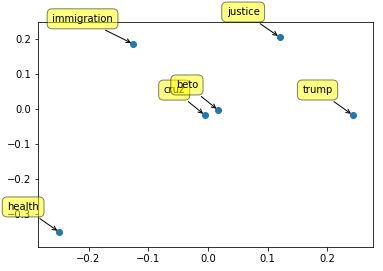

In [66]:
# MDS plot
adist = np.array(dists)
amax = np.amax(adist)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cand_issues, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

Based on the above MDS map we can conclude that:
1. There is a strong correlation between the two candidates as was indicative of the lift values, while the sentiment is unclear, people appear to identify that both candidates present a similarly strong stance regarding the key issues.
2. It appears that both candidates are somewhat less related to health as they are in regards to the other three key issues.
3. The four key issues appear to have low correlation to each other and people consider them as somewhat independent, while it shall be noted that health is the most "independent" being disussed in separate from justice, immigration and Trump.

### Sentiment Analysis - General

In order to analyze the semtiments of candidates and issues, performed the following:
1. Unifying different variations of the names of the candidates into one variation
2. Unifying different variations of the names of the issues into one variation
3. Going over the tweets, looking at every sentence by itself, searching for mentions of both an issue and the candidate with a maximum distance between them
4. Extracting the part of the sentence relating to the candidate and the issue with several words before an after
5. Calculating the sentiment of the extracted part
6. Calculating an average of the sentiments compund value, outputing it as the result sentiment 

It shall be noted that we didn't stem the words since after checking the linguistic variations of the issues and candidates names, we saw that there are not so many linguistic variations of these terms and as a result stemming while adding complexity and reducing inerpretability did not add significant value to our model.

In [69]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thomas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv
from collections import namedtuple
import re

CRUZ_VARIATIONS = ['Cruz','@tedcruz’s','tedcruz', 'ted', 'choosecruz', 'cruz-', '@tedcruz', '@ted', '@choosecruz', '@cruz-']
BETO_VARIATIONS = ['Beto','BetoORourke','O\'Rourke','Beto O\'Rourke','Beto\'s','BetoORourke’s','@BetoORourke','betoorourke', "o'rourke", 'rourke', '@betoorourke', "@o'rourke", '@rourke']
TRUMP_VARIATIONS = ['@realtrumpTrump','donald trump','Donald Trump','Donald trump','Donald','donald', 'realdonaldtrump', '@donald', '@realdonaldtrump','@donald:', '@realdonaldtrump:']
IMMIGRATION_VARIATIONS = ['non-citizens','border','wall','immigrant','caravan','Non-Citizens','Border','Wall','Immigrant','Caravan']
JUSTICE_VARIATIONS = ['legal', 'fraud', 'investigation', 'justice', 'illegal', 'law', 'prison', 'attorney','Legal', 'Fraud', 'Investigation', 'Justice', 'Illegal', 'Law', 'Prison', 'Attorney']
HEALTH_VARIATIONS = ['health', 'healthcare', 'Health', 'Healthcare' ,'\*medicare', '\*medicaid', 'obamacare', 'Obamacare']

CITY_SIZE_MIDPOINT = 100000
MAX_SUBJECTS_DISTANCE = 10
SUB_SENTENCE_BOUNDARY = 2
LEFT = -1
RIGHT = 1
SMALL_CITY = 0
BIG_CITY = 1
EMPTY_CITY = -1

analyser = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english')) 

Tweet = namedtuple('Tweet', 'tweet_text tweet_location tweet_user')
Substitution = namedtuple('Substitution','subject substitutions')

substitution_list = [Substitution('beto',BETO_VARIATIONS),
                    Substitution('cruz',CRUZ_VARIATIONS),
                    Substitution('trump',TRUMP_VARIATIONS),
                    Substitution('immigration',IMMIGRATION_VARIATIONS),
                    Substitution('justice',JUSTICE_VARIATIONS),
                    Substitution('health',HEALTH_VARIATIONS)]

def skip_irrelevant_tokens(words,index,direction):
    global stop_words
    
    while index > 0 and index < len(words)-1:
        if words[index + direction] in stop_words or not words[index + direction].isalpha():
            index = index + direction
        else:
            return index
    return index
        
#for each pair of candidate-issue
#Traversing over the words, counting the index position in two ways: 1. General index, counting
#how many tokens have we went through. 2. Word index, counting only the words we went through, meaning
#no stop words, and only alpha words. We search for the two words, and if the distance between them
#is small enough, we extract part of the sentence around them
def measure_words_distance_and_extract(word1,word2,sentence):
    global stop_words
    general_index = 0
    words_index = 0
    word1_general_index = 0
    word2_general_index = 0
    word1_words_index = None
    word2_words_index = None
    word_tokens = word_tokenize(sentence)
    for word in word_tokens:
        if word.lower() == word1.lower():
            word1_words_index = words_index
            word1_general_index = general_index
        if word.lower() == word2.lower():
            word2_words_index = words_index
            word2_general_index = general_index
        if word1_words_index is not None and word2_words_index is not None:
            break
        if word not in stop_words and word.isalpha():
            words_index += 1
        general_index += 1
    if word1_words_index is None or word2_words_index is None or abs(word1_words_index - word2_words_index) > MAX_SUBJECTS_DISTANCE:
        return None

    if word1_general_index < word2_general_index:
        left_index = word1_general_index
        right_index = word2_general_index
        
    else:
        left_index = word2_general_index
        right_index = word1_general_index
    
    stop_words_count = 0
    
    for i in range(1,SUB_SENTENCE_BOUNDARY+1):
        left_index = skip_irrelevant_tokens(word_tokens,left_index,LEFT)
        right_index = skip_irrelevant_tokens(word_tokens,right_index,RIGHT)
        if left_index - i >= 0:
            left_index = left_index - i
        if right_index < len(word_tokens):
            right_index = right_index + i
    
    return ' '.join(word_tokens[left_index:right_index])
    
def extract_mutual_context(subject1,subject2,document):
    global stop_words
    
    subject1 = subject1.lower()
    subject2 = subject2.lower()
    
    for sentence in sent_tokenize(document):
        sub_sentence = measure_words_distance_and_extract(subject1,subject2,sentence.lower())
        if sub_sentence is None:
            continue

        return sub_sentence
    return None
        
def analyze_document_joint_sentiment(subject1,subject2,document):
    global analyser
    
    sub_sentence = extract_mutual_context(subject1,subject2,document)
    if sub_sentence is None:
        return None
    snt = analyser.polarity_scores(sub_sentence)
    return snt['compound']

def analyze_joint_sentiment(subject1,subject2,documents):
    total_compound = 0
    relevant_documents_count = 0
    for document in documents:
        sentiment_compound = analyze_document_joint_sentiment(subject1,subject2,document)
        if sentiment_compound is not None:
            total_compound += sentiment_compound
            relevant_documents_count += 1
    if relevant_documents_count == 0:
        total_compound = -1
    else:
        total_compound = total_compound / relevant_documents_count
    return (total_compound, relevant_documents_count)

### Sentiment Analysis - Geo

In order to analyze the sentiments of the tweets for each candidate with respect to the scale of the cities the tweets originated from, we do the following:
1. Importing a list of Texas cities, dividing them into big and small cities by a defined threshold
2. Dividing the tweets into big cities tweets and small cities tweets
3. Performing sentiment analysis for every candidate, for each tweets group, on the tweets relating to this candidate



In [71]:
def get_cities():
    big_cities = []
    small_cities = []
    with open('cities.csv','r') as csv_file:
        csv_reader = csv.reader(csv_file, quotechar='"', delimiter=',',quoting=csv.QUOTE_ALL, skipinitialspace=True)
        for row in csv_reader:
            city_name = row[0].replace(' city, Texas','')
            city_population = int(row[1])
            if city_population > CITY_SIZE_MIDPOINT:
                big_cities.append(city_name)
            else:
                small_cities.append(city_name)
    return (small_cities,big_cities)

def get_city_classification(tweet_location,small_cities,big_cities):
    for city in small_cities:
        if city.lower() in tweet_location.lower():
            return SMALL_CITY
    for city in big_cities:
        if city.lower() in tweet_location.lower():
            return BIG_CITY
    return EMPTY_CITY

def group_and_filter_tweets_by_city(tweets,small_cities,big_cities):
    small_cities_tweets = []
    big_cities_tweets = []
    
    for tweet in tweets:
        tweet_location = tweet.tweet_location.lower()
        if tweet_location is None or tweet_location == '' or not ('tx' in tweet_location or 'texas' in tweet_location):
            continue
        city_scale = get_city_classification(tweet_location,small_cities,big_cities)
        if city_scale == BIG_CITY:
            big_cities_tweets.append(tweet.tweet_text)
        elif city_scale == SMALL_CITY:
            small_cities_tweets.append(tweet.tweet_text)     
    return (small_cities_tweets,big_cities_tweets)

def analyze_average_sentiment(subject,tweets):
        sentiment = 0
        relevant_tweets_count = 0
        for tweet in tweets:
            if subject.lower() in tweet.lower():
                sentiment += analyser.polarity_scores(tweet)['compound']
                relevant_tweets_count += 1
        if relevant_tweets_count == 0:
            return None
        return (sentiment/relevant_tweets_count,relevant_tweets_count)

def analyze_sentiment_by_city_scale(subject,documents,small_cities,big_cities):
    small_cities_tweets_texts,big_cities_tweets_texts = group_and_filter_tweets_by_city(documents,small_cities,big_cities)
    
    small_cities_sentiment = analyze_average_sentiment(subject,small_cities_tweets_texts)
    big_cities_sentiment = analyze_average_sentiment(subject,big_cities_tweets_texts)

    return (small_cities_sentiment,big_cities_sentiment)
    
def calculate_candidates_issues_sentiments(tweets,candidates,issues):
    joint_sentiments = {}
    joint_sentiments_small_cities = {}
    joint_sentiments_big_cities = {}
    tweets_texts = [tweet.tweet_text for tweet in tweets]
    
    small_cities, big_cities = get_cities()
    
    for candidate in candidates:
        for issue in issues:
            joint_sentiments[(candidate,issue)] = analyze_joint_sentiment(candidate,issue,tweets_texts)
        small_cities_sentiment,big_cities_sentiment = analyze_sentiment_by_city_scale(candidate,tweets,small_cities,big_cities)
        joint_sentiments_small_cities[(candidate)] = small_cities_sentiment
        joint_sentiments_big_cities[(candidate)] = big_cities_sentiment
    return joint_sentiments,joint_sentiments_small_cities,joint_sentiments_big_cities

def get_tweets():
    tweets = []
    with open('Tweets_6.csv','r', encoding="utf8") as csv_file:
        csv_reader = csv.reader(csv_file, quotechar='"', delimiter=',',quoting=csv.QUOTE_ALL, skipinitialspace=True)
        for row in csv_reader:
            tweet_text = row[1]
            tweet_location = row[3]
            tweet_user = row[4]
            tweets.append(Tweet(tweet_text,tweet_location,tweet_user))
    return list(set(tweets))

def multi_word_replace(text,subject,variations):
    rc = re.compile('|'.join(variations))
    return rc.sub(subject, text)

def manipulate_tweets(tweets):
    global substitution_list
    manipulated_tweets = []
    for tweet in tweets:
        new_tweet_text = tweet.tweet_text
        for substitution in substitution_list:
            new_tweet_text = multi_word_replace(new_tweet_text,substitution.subject,substitution.substitutions)
        manipulated_tweets.append(Tweet(new_tweet_text,tweet.tweet_location,tweet.tweet_user))
    return manipulated_tweets

In [72]:
tweets = get_tweets()
tweets = manipulate_tweets(tweets)

candidates = ['beto','cruz']
issues = ['trump','immigration','health','justice']
joint_sentiments,joint_sentiments_small_cities,joint_sentiments_big_cities = calculate_candidates_issues_sentiments(tweets,candidates,issues)

print ('General sentiments\n')
print(joint_sentiments)
print ('\nGeographic sentiments\nSmall Cities')
print(joint_sentiments_small_cities)
print('\nBig Cities')
print(joint_sentiments_big_cities)

General sentiments

{('beto', 'trump'): (0.035989285714285724, 28), ('beto', 'immigration'): (0.09077333333333333, 15), ('beto', 'health'): (0.5018687500000001, 16), ('beto', 'justice'): (0.7906, 1), ('cruz', 'trump'): (0.006082258064516126, 124), ('cruz', 'immigration'): (0.11017777777777778, 9), ('cruz', 'health'): (0.478235, 20), ('cruz', 'justice'): (0.41463333333333335, 3)}

Geographic sentiments
Small Cities
{'beto': (0.17181785714285716, 28), 'cruz': (0.19628787878787882, 33)}

Big Cities
{'beto': (0.17694196428571435, 112), 'cruz': (0.11585849056603773, 106)}


In [73]:
small_cities_sent={('beto','small_city'):0,('cruz','small_city'):0}
for k,v in small_cities_sent.items():
        small_cities_sent[k]=joint_sentiments_small_cities[k[0]]
small_cities_sent

big_cities_sent={('beto','big_city'):0,('cruz','big_city'):0}
for k,v in big_cities_sent.items():
        big_cities_sent[k]=joint_sentiments_big_cities[k[0]]
big_cities_sent

joint_sentiments_loc={**small_cities_sent,**big_cities_sent}

In [74]:
joint_sentiments_table = pd.DataFrame(index=candidate, columns=issues)

for c,i in joint_sentiments:
    joint_sentiments_table.loc[c][i] = float(joint_sentiments[c,i][0])
    

joint_sentiments_loc_table = pd.DataFrame(index=candidate, columns=('big_city','small_city'))

for c,i in joint_sentiments_loc:
    joint_sentiments_loc_table.loc[c][i] = float(joint_sentiments_loc[c,i][0])


Using all of the above below are the final sentiment analysis scores for each of the candidates in regards to the four identified key issues as well as localized among small and big cities.

In [75]:
joint_sentiments_table

,trump,immigration,health,justice
cruz,0.00608226,0.110178,0.478235,0.414633
beto,0.0359893,0.0907733,0.501869,0.7906


In [76]:
joint_sentiments_loc_table

,big_city,small_city
cruz,0.115858,0.196288
beto,0.176942,0.171818


Regarding the general sentiment analysis, we can see that:
1. We see that cruz relation to trump is mentioned way more then beto's relation to trump, as we could expect. Cruz has a slight negative sentiment related to trump, while beto is surprisingly related to trump in a more neutral way. Further analysis on a larger sample could shed some more light and explain whether or not the relation is actually negative, and could effect negativly on Cruz
2. We can see that Beto is related to justice more positively then Cruz (0.69 vs 0.58) and also with more mentions then Cruz. Although Cruz's relation to that issue is positive, he might want to emphasize more on that matter
3. We can see that Cruz and Beto are both related to health issues in a positive way (0.47 vs 0.5), with beto having a slight more positively relation to it, Cruz might want to relate more to that issue and raise public opinion regarding his relation to it
4. The most related candidate and issue are Cruz and Trump. Cruz should really carefully assess the influence of trump on his image and utilize trump's effect and power on public opinion in his favor.

Regarding the geographic sentiment analysis:
1. First, we could see that given the diversity in locations in twitter, the relevant Texas sample size reduced drastically leaving us with a much smaller sample to create statistically valid insights from
2. We could see that in small cities, Beto and Cruz's sentiments are very close, while in bigger cities the sentiment towards beto is more positive. This shows that Beto has a slight advantage on Cruz in bigger cities
3. We can see that in general, there are more mentions of the candidates in big cities then in smaller cities, and this is interesting given the fact that small cities total population is 2 times the population of the big cities we chose. This might mean that people in smaller cities are less involved in politics then in bigger cities, and so the candidates would want to emphasize on bigger cities.



### Lift Analysis - Geo

Lastly, we perform a lift analysis between candidates in regards to location (spliting between small and big cities).

In [78]:
small_cities,big_cities= get_cities()

def filter_tweets_by_city(tweets,small_cities,big_cities):
    small_cities_tweets = []
    big_cities_tweets = []
    
    for tweet in tweets:
        tweet_location = tweet.tweet_location.lower()
        if tweet_location is None or tweet_location == '' or not ('tx' in tweet_location or 'texas' in tweet_location):
            continue
        city_scale = get_city_classification(tweet_location,small_cities,big_cities)
        if city_scale == BIG_CITY:
            big_cities_tweets.append(tweet)
        elif city_scale == SMALL_CITY:
            small_cities_tweets.append(tweet)
    #print(len(small_cities_tweets),len(big_cities_tweets))        
    return (small_cities_tweets,big_cities_tweets)

small_city_tweets,big_city_tweets=filter_tweets_by_city(tweets,small_cities,big_cities)

In [79]:
small_city_len=len(small_city_tweets)
big_city_len=len(big_city_tweets)

In [80]:
cruz_tweets=0
beto_tweets=0
for tweet in tweets:
    tweet=tweet[0].lower()
    print(tweet)
    if 'cruz' in tweet or 'ted' in tweet:
        cruz_tweets+=1
    if 'beto' in tweet or 'o’rourke' in tweet:
        beto_tweets+=1

rt @funder: beto just absolutely crushed cruz again in the debate. and sounds presidential. which is the kind of senator texas deserves. #t…
rt @realtrumptrump: beto o’rourke is a total lightweight compared to ted cruz, and he comes nowhere near representing the values and desir…
rt @amjoyshow: do you think if beto beto loses against ted cruz, he will still have the momentum to run for president on the democratic…
mary and i are begging you to nudge friends and family to votered to save #america. our forefathers took a bullet and all you have to do is #voterepublican thank y’all https://t.co/xm6hcwbrlk
@seanhannity 😂 your president and his head of 
“intelligence” are giving handjobs to the saudi terrorists in front of the whole world, and you’re over here talking about recipes?? 😂 #maga #hannity #foxnews #trump #redwave #bluewave #purplewave #saudiarabia #khashoggi #alqaeda #wahhabism
rt @thomaskaine5: texas:   texas is almost 40% (correction) hispanics.  but i been told hispanics are 

rt @antonioarellano: texas it’s time to justiceize marijuana, and finally stop putting people of color in jail for something that white peopl…
rt @realmagasteve: texas voter justice ring buscruz, slapped w/30-felonies:

texas ag ken paxton filed charges against a “highly organized vot…
rt @ingrahamangle: two texas residents, enriching cartels (and themselves) by smuggling justices after traffic stop. cost 18,000 pesos per…
"texas didn't offer brewer, we get it" https://t.co/qfscjlvhn3
rt @zemanlynnz: another example of why texas deserves better! #betofortexas #votebeto #firecruz #texas #beto https://t.co/ah4vdefydn
rt @politicususa: rachel maddow slams texas republicans for intentionally slow-walking voter registration applications. #ctl #p2 #maddow ht…
@msnbc @hardball both of them have no integrity or self respect.  ted cruz talks big but eventually he would lick trump's spit just to get eleccruz.
rt @krassenstein: a texas hoa is forcing a family to remove this beto sign they paincru

this is the absurdly long line for early voting in harris county, texas this morning. hillary clinton won this county…
@bts_twt his side profile is no joke...like damn https://t.co/yjj6jjjv4g
rt beto: we will be a bridge over the divisiveness. never allowing party or geography or any other small difference to stand in the…
rt @charliekirk11: hey beto , i mean robert francis o’rourke:

there are 100,000 rsvp’s for @realtrumptrump rally in texas

you better sta…
rt @pismo_b: i'm proud to support @tedcruz for #txsen. this is why texas sheriffs #choosecruz --&gt; "he's been an outstanding senator for tex…
rt @sarahpalinusa: democrat party tells immigration to vote in texas, is caught sending apps to immigrations with citizenship box pre-checke…
rt @diamondandsilk: should id be required in order to vote?

https://t.co/uq7iymagwm
#ad love bacon? heb has you covered! check out their recipe page for inspiration for your next fall meal using wright brand bacon! https://t.co/z8vpcdrosh https://t

In [81]:
beto_tweets

1548

In [82]:
small_city_list=[]
for each in small_cities:
    for cand in candidate:
        small_city_list.append(((cand,each),0))
small_city_list

big_city_list=[]
for each in big_cities:
    for cand in candidate:
        big_city_list.append(((cand,each),0))
big_city_list

small_city_dict = dict((x,y) for x, y in small_city_list)
big_city_dict = dict((x,y) for x, y in big_city_list)
small_city_dict

{('cruz', 'Edinburg'): 0,
 ('beto', 'Edinburg'): 0,
 ('cruz', 'Sugar Land'): 0,
 ('beto', 'Sugar Land'): 0,
 ('cruz', 'Mission'): 0,
 ('beto', 'Mission'): 0,
 ('cruz', 'Conroe'): 0,
 ('beto', 'Conroe'): 0,
 ('cruz', 'Bryan'): 0,
 ('beto', 'Bryan'): 0,
 ('cruz', 'Longview'): 0,
 ('beto', 'Longview'): 0,
 ('cruz', 'Pharr'): 0,
 ('beto', 'Pharr'): 0,
 ('cruz', 'New Braunfels'): 0,
 ('beto', 'New Braunfels'): 0,
 ('cruz', 'Baytown'): 0,
 ('beto', 'Baytown'): 0,
 ('cruz', 'Flower Mound town, Texas'): 0,
 ('beto', 'Flower Mound town, Texas'): 0,
 ('cruz', 'Cedar Park'): 0,
 ('beto', 'Cedar Park'): 0,
 ('cruz', 'Temple'): 0,
 ('beto', 'Temple'): 0,
 ('cruz', 'Missouri City'): 0,
 ('beto', 'Missouri City'): 0,
 ('cruz', 'Georgetown'): 0,
 ('beto', 'Georgetown'): 0,
 ('cruz', 'North Richland Hills'): 0,
 ('beto', 'North Richland Hills'): 0,
 ('cruz', 'Mansfield'): 0,
 ('beto', 'Mansfield'): 0,
 ('cruz', 'Victoria'): 0,
 ('beto', 'Victoria'): 0,
 ('cruz', 'Harlingen'): 0,
 ('beto', 'Harlingen'):

In [85]:
for message in small_city_tweets:
    flag=0
    for k,v in small_city_dict.items():
        loc=k[1].lower()
        cand=k[0].lower()
        msg_loc_lower=message[1].lower().split(',')[0]
        msg_lower=message[0].lower()
        if loc in msg_loc_lower:
            if cand in msg_lower:
                small_city_dict[k]+=1

In [86]:
small_city_dict = {k : v for k,v in small_city_dict.items() if v>0}

In [87]:
cruz_smallcity={('cruz','small_city') : 0 }
beto_smallcity={('beto','small_city') : 0 }
for k,v in small_city_dict.items():
    if k[0]=='cruz':
        cruz_smallcity[('cruz','small_city')]+=v
    if k[0]=='beto':
        beto_smallcity[('beto','small_city')]+=v

In [88]:
for message in big_city_tweets:
    flag=0
    for k,v in big_city_dict.items():
        loc=k[1].lower()
        cand=k[0].lower()
        msg_loc_lower=message[1].lower().split(',')[0]
        msg_lower=message[0].lower()
        if loc in msg_loc_lower:
            if cand in msg_lower:
                #print('Yes!!!!')
                big_city_dict[k]+=1

In [89]:
big_city_dict = {k : v for k,v in big_city_dict.items() if v>0}
big_city_dict

{('cruz', 'Houston'): 25,
 ('beto', 'Houston'): 32,
 ('cruz', 'Dallas'): 25,
 ('beto', 'Dallas'): 21,
 ('cruz', 'Austin'): 22,
 ('beto', 'Austin'): 27,
 ('cruz', 'Fort Worth'): 2,
 ('beto', 'Fort Worth'): 2,
 ('cruz', 'El Paso'): 4,
 ('beto', 'El Paso'): 8,
 ('cruz', 'Corpus Christi'): 2,
 ('beto', 'Corpus Christi'): 1,
 ('cruz', 'Plano'): 3,
 ('beto', 'Plano'): 3,
 ('cruz', 'Lubbock'): 4,
 ('beto', 'Lubbock'): 2,
 ('beto', 'Irving'): 1,
 ('cruz', 'Amarillo'): 1,
 ('cruz', 'Brownsville'): 1,
 ('beto', 'Brownsville'): 1,
 ('cruz', 'McKinney'): 2,
 ('beto', 'McKinney'): 2,
 ('cruz', 'Frisco'): 1,
 ('beto', 'Frisco'): 2,
 ('cruz', 'Pasadena'): 1,
 ('cruz', 'McAllen'): 3,
 ('beto', 'McAllen'): 3,
 ('cruz', 'Waco'): 1,
 ('cruz', 'Denton'): 4,
 ('beto', 'Denton'): 2,
 ('beto', 'Midland'): 1,
 ('cruz', 'Abilene'): 1,
 ('cruz', 'Richardson'): 2,
 ('cruz', 'College Station'): 1,
 ('beto', 'College Station'): 3,
 ('cruz', 'Tyler'): 2,
 ('beto', 'Tyler'): 1,
 ('beto', 'Wichita Falls'): 1,
 ('cruz

In [90]:
cruz_bigcity={('cruz','big_city') : 0 }
beto_bigcity={('beto','big_city') : 0 }
for k,v in big_city_dict.items():
    if k[0]=='cruz':
        cruz_bigcity[('cruz','big_city')]+=v
    if k[0]=='beto':
        beto_bigcity[('beto','big_city')]+=v

city_cand={**cruz_bigcity,**beto_bigcity,**cruz_smallcity,**beto_smallcity}
city_cand

{('cruz', 'big_city'): 110,
 ('beto', 'big_city'): 116,
 ('cruz', 'small_city'): 70,
 ('beto', 'small_city'): 56}

In [91]:
city_len={'small_city':small_city_len, 'big_city':big_city_len}
city_len

{'small_city': 169, 'big_city': 450}

In [92]:
cand_tweets=beto_tweets,cruz_tweets
cand_tweets

(1548, 1756)

In [93]:
lift_values_loc={}
for k,v in city_cand.items():
    x=str(k[1])
    #print(x)
    if k[0]=='cruz':
        pair_lift=((len(tweets)*v)/(cruz_tweets * city_len[x]))
        lift_values_loc[k] = float(round(pair_lift,2))
    if k[0]=='beto':
        pair_lift=((len(tweets)*v)/(beto_tweets * city_len[x]))
        lift_values_loc[k] = float(round(pair_lift,2))

In [94]:
lift_values_loc

{('cruz', 'big_city'): 0.81,
 ('beto', 'big_city'): 0.97,
 ('cruz', 'small_city'): 1.37,
 ('beto', 'small_city'): 1.24}

In [95]:
lift_table_loc = pd.DataFrame(index=('cruz','beto'), columns=('big_city','small_city'))
                                                                
for c,i in lift_values_loc:
    lift_table_loc.loc[c][i] = float(lift_values_loc[c,i])

In [96]:
lift_table_loc

,big_city,small_city
cruz,0.81,1.37
beto,0.97,1.24


As per the above lift table, we can conclude the following:
1. Both candidates are almost equally popular in big cities while Cruz is a clear winner for small cities.
3. If Beto focuses more on targeting big cities in Texas, he would have a better chance of winning more voting candidates and thus overcome the gap created due to popularity of Cruz in small cities.